In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import altair as alt

In [14]:
# build a co-authorship graph

# add a node for each author, and an edge for each co-authorship (i.e., if they are in the same row, they are co-authors)
# the weight of the edge is the number of times they have co-authored a paper

# read the data
data = pd.read_csv('dblp_graph_conference.csv')

# create a graph
G = nx.Graph()

# add nodes (author_id) and nodes attributes (author_name, author_org)
author_data = {}

for i in range(len(data)):
    author_ids = data['author_id'][i].split(';')
    author_names = data['author_name'][i].split(';')
    author_orgs = str(data['author_org'][i]).split(';')
    n_citations = data['n_citation'][i] if not np.isnan(data['n_citation'][i]) else 0

    for j, author_id in enumerate(author_ids):
        # Only add unique authors to the dictionary
        if author_id not in author_data:
            author_data[author_id] = {
                'name': author_names[j] if j < len(author_names) else np.nan,
                'org': author_orgs[j] if j < len(author_orgs) else np.nan,
                'total_citations': 0,
                'total_papers': 0
            }
        author_data[author_id]['total_citations'] += n_citations
        author_data[author_id]['total_papers'] += 1

# Add nodes with attributes to the graph
for author_id, attributes in author_data.items():
    G.add_node(author_id, name=attributes['name'], org=attributes['org'], total_citations=attributes['total_citations'], total_papers=attributes['total_papers'])

In [15]:
# randomly select 10 nodes and print their attributes
nodes = np.random.choice(list(G.nodes()), 10)
for node in nodes:
    print(f"Node {node}: {G.nodes[node]}")

Node 2082727544: {'name': 'Fabio Galasso', 'org': 'OSRAM Corporate Technology, Germany', 'total_citations': 51, 'total_papers': 2}
Node 2749063304: {'name': 'Huiyi Liu', 'org': 'nan', 'total_citations': 1, 'total_papers': 1}
Node 2472471948: {'name': 'Amir Hooshang Tajfar', 'org': 'Fac. of Comput. & Inf. Technol., Payam Noor Univ., Tehran, Iran', 'total_citations': 4, 'total_papers': 1}
Node 2167354121: {'name': 'Yoshinobu Kawahara', 'org': 'Inst of Scientific & Industrial Research, Osaka University, Osaka, Japan', 'total_citations': 41, 'total_papers': 2}
Node 1936444166: {'name': 'Noam Hazon', 'org': 'Ariel University, Ariel, Israel', 'total_citations': 0, 'total_papers': 1}
Node 2115425185: {'name': 'Marc Noy', 'org': 'Univ. Politecnica de Catalunya', 'total_citations': 1, 'total_papers': 4}
Node 2170032099: {'name': 'Enric Plaza', 'org': 'IIIA-CSIC, Artificial Intelligence Research Institute#TAB#', 'total_citations': 11, 'total_papers': 1}
Node 2909766715: {'name': 'Jose Ortiz Cost

In [17]:
# add edges
for i in range(len(data)):
    authors = data['author_id'][i].split(';')
    for author1 in authors:
        for author2 in authors:
            if author1 != author2:
                if G.has_edge(author1, author2):
                    G[author1][author2]['weight'] += 1
                else:
                    G.add_edge(author1, author2, weight=1)

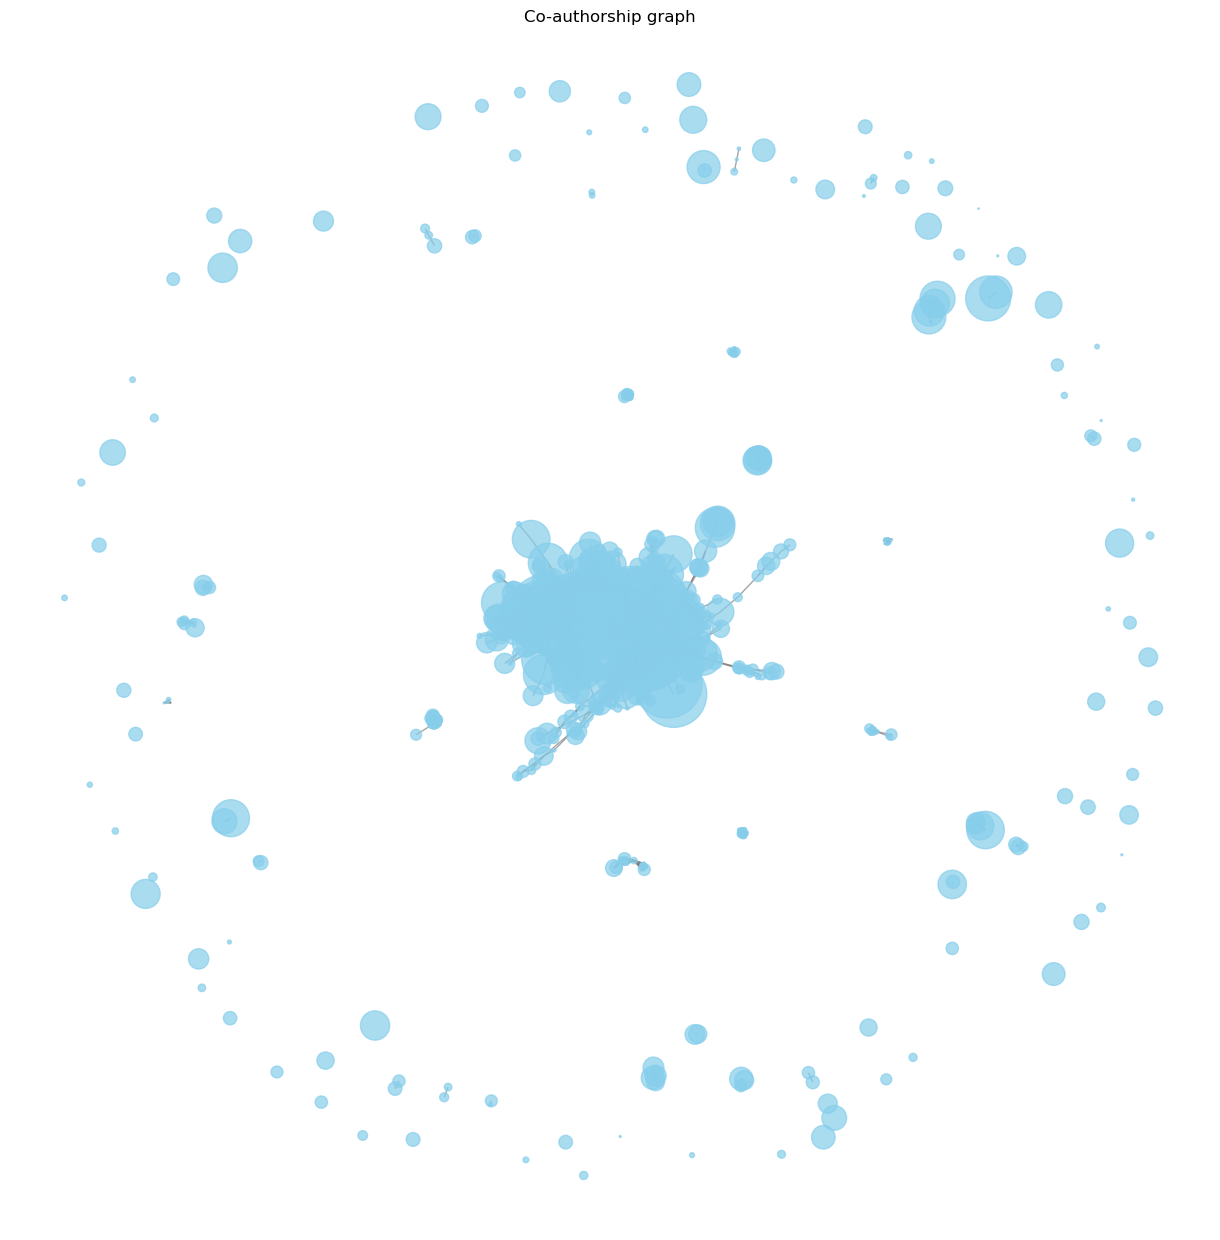

In [18]:
# draw the graph, but only the top 1000 authors
top_authors = sorted(G.nodes, key=lambda x: G.degree(x), reverse=True)[:1000]
G_top = G.subgraph(top_authors)

node_sizes = [G_top.nodes[author]["total_citations"] for author in G_top.nodes]
pos = nx.spring_layout(G_top)

plt.figure(figsize=(12, 12))
nx.draw(G_top, pos, node_size=node_sizes, with_labels=False, node_color='skyblue', edge_color='gray',alpha=0.7)
plt.title('Co-authorship graph')
plt.show()

In [23]:
nodes_df = pd.DataFrame({
    'author_id': list(G_top.nodes),
    'x': [pos[author][0] for author in G_top.nodes],
    'y': [pos[author][1] for author in G_top.nodes],
    'name': [G_top.nodes[author]["name"] for author in G_top.nodes],
    'org': [G_top.nodes[author]["org"] for author in G_top.nodes],
    'total_citations': [G_top.nodes[author]["total_citations"] for author in G_top.nodes],
    'total_papers': [G_top.nodes[author]["total_papers"] for author in G_top.nodes]
})

# Altair chart for interactive and zoomable visualization
alt_chart = alt.Chart(nodes_df).mark_circle().encode(
    x='x:Q',
    y='y:Q',
    size=alt.Size('total_citations:Q', scale=alt.Scale(range=[10, 500]), legend=None),
    color=alt.Color('total_papers:Q', scale=alt.Scale(scheme='blueorange')),
    tooltip=['name:N', 'org:N', 'total_citations:Q', 'total_papers:Q']
).interactive()  # This makes the chart zoomable and pannable

# Display Altair chart
alt_chart

/opt/miniconda3/envs/si608/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/miniconda3/envs/si608/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/miniconda3/envs/si608/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)